In [1]:
from Nozzle_1D import Nozzle
temp = Nozzle("inputs.nml")
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%bash 
gcc -shared -o c_functions.so -fPIC functions.c

In [3]:
p,u,rho = temp.compute_newton()

In [4]:
temp.set_arrays()
U = np.random.rand(*temp.U.shape)
V = temp.primitive_to_conserved(U)[0]
temp_U = temp.conserved_to_primitive(V)

In [5]:
temp.set_geometry()
temp.set_initial_conditions()
temp.set_boundary_conditions()

R1 = temp.iteration_step()
temp.set_boundary_conditions()


In [6]:
R1

array([1.45436462e-01, 1.10228607e+02, 9.00278940e+04])

print(temp.V)

1.0033300147913797
0.7443852981253914
0.9087144703299599
0.6545943572536699
0.7696576251098065
0.7654094732694833
0.714753476677675
0.6066167697092513
0.4378820703365192
0.3184920794356602
0.24062147596383518
0.2154066994142676
0.232038483641157
0.27667754387134436
0.328424498914106
0.3588039091706927
0.3850546246566646
0.39596675943518467
0.3260519914554179
0.3530706230992832
0.36092722723305315
0.3444140298184638
0.3516824066500863
0.3500022165810647
0.3573870874957726
0.3185018534491163
0.32856200752969283
0.3090427097217066
0.2934412484025804
0.26116247611192467
0.22617522892770428
0.21005191012837007
0.20981918145569564
0.1954758603805422
0.19176975618205364
0.16934761620613106
0.17073051416788476
0.17842427771364927
0.17421310747702756
0.18828831605645155
0.16190018260487535
0.12084887937220865
0.06940635975450207
0.053335353628158576
0.06262844826468533
0.07050802611435011
0.07530549000934733
0.08129081849610367
0.09051148658063389
0.08633782905825749
0.07811106858470822
0.07015

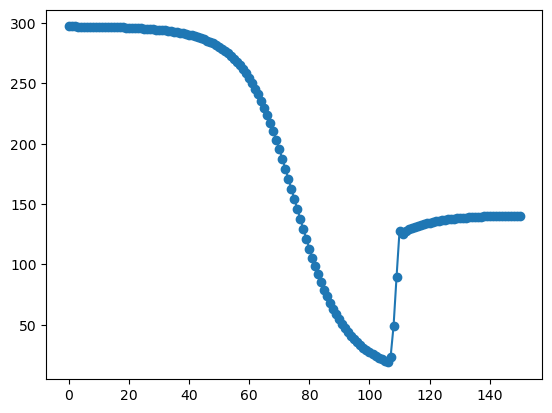

In [7]:
convergence_history = []
for i in range(30000):
    
    R = temp.iteration_step()
    if i%100 == 0:
        print(np.max(R/R1))
        convergence_history.append(R/R1)
    temp.set_boundary_conditions()
    if np.any(R/R1)<.00001:
        print("Converged")
        break
p_compute = temp.V[:,2]
u_compute = temp.V[:,1]
rho_compute = temp.V[:,0]
plt.plot(p_compute[1:],"-o")


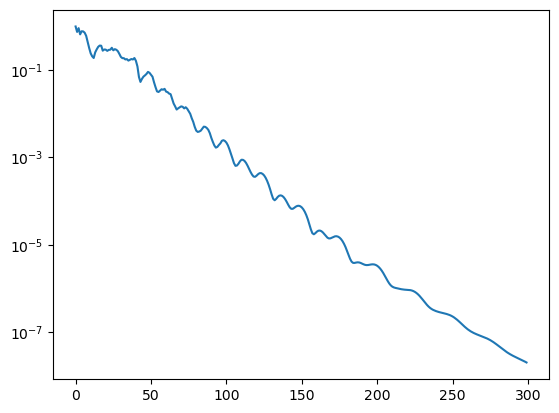

In [8]:
ch = np.array(convergence_history)
plt.semilogy(ch[:,0])

In [9]:
temp.V[-1,2]

140.35504179288927